# Availability and Performance


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import set_config

In [2]:
dir_local = set_config.ConfigSectionMap("SectionOne")['local']
dir_sanofi_share = set_config.ConfigSectionMap("SectionOne")['sanofi']
dir_race = set_config.ConfigSectionMap("SectionOne")['race']

print ("dir_sanofi_share is %s" % (dir_sanofi_share))
print ("dir_local is %s" % (dir_local))
print ("dir_race is %s" % (dir_race))

dir_sanofi_share is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Frankfurt sprint/SFD/
dir_local is C:/Users/mark_/Documents/McLaren2021/Sanofi/
dir_race is C:/Users/mark_/Sanofi/Sanofi x McLaren sharing - General/Race Dashboard data


In [3]:
filename = 'oee_extracts_all_sites.xlsx'
path = os.path.join(dir_local, filename)
df = pd.read_excel(path, na_values=('-'))

In [4]:
df.dropna(subset={'Week'}, inplace=True)
df[['OEE %','Changeover','Availability %','Performance %']] = df[['OEE %','Changeover','Availability %','Performance %']].mul(100)

In [5]:
df['WeekOfYear'] = pd.to_numeric(df['Week'].str[1:3])
df['Year'] = pd.to_numeric(df['Week'].str[4:])
dates = df.Year*100+df.WeekOfYear
df['Date'] = pd.to_datetime(dates.astype(str) + '0', format='%Y%W%w')
df.head()

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12


In [6]:
df.dropna(subset=['WeekOfYear'], inplace=True)
df

,Week,Line,OEE %,Changeover,Unplanned_tech_loss,Availability %,Performance %,WeekOfYear,Year,Date
24,W01-2020,LSX - 1030 Packaging Line,51.963834,6.991830,0.211838,71.102124,73.083378,1,2020,2020-01-12
25,W01-2020,LSX - 1070-1 Packaging Line,35.919900,6.247921,0.470711,47.417234,76.242102,1,2020,2020-01-12
26,W01-2020,LSX - 1070-2 Packaging Line,3.129890,0.000000,0.000000,100.000000,3.129890,1,2020,2020-01-12
27,W01-2020,LSX - C65-1 Packaging Line,39.046651,13.997290,0.296680,60.164860,64.967799,1,2020,2020-01-12
28,W01-2020,LSX - C65-2 Packaging Line,15.830116,8.909910,0.137793,70.655405,22.404678,1,2020,2020-01-12
...,...,...,...,...,...,...,...,...,...,...
8935,W53-2020,TRS - L19 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8936,W53-2020,TRS - L21 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8937,W53-2020,TRS - L22 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10
8938,W53-2020,TRS - L24 Packaging Line,NaN,NaN,NaN,NaN,NaN,53,2020,2021-01-10


In [7]:
df.set_index('Date', inplace=True)

In [8]:
df.sort_index(inplace=True)

In [9]:
rolling_avg = df.groupby('Line')[['OEE %','Performance %','Availability %']].rolling(window=4).mean().reset_index()

In [10]:
# keep the data after this start date
start_date = '2021-04-01'

rolling_avg = rolling_avg[rolling_avg.Date >= start_date]


In [11]:
print ("Number of Unique Plants/Factories: {}".format(len(rolling_avg.Line.str[:3].unique())))
print ("Number of Unique Lines: {}".format(len(rolling_avg.Line.unique())))
print ("Number of Unique Lines recording OEE % values: {}".format(len(rolling_avg[rolling_avg['OEE %'] > 0].Line.unique())))

Number of Unique Plants/Factories: 19
Number of Unique Lines: 234
Number of Unique Lines recording OEE % values: 197


In [12]:
#  create a Plant column from first 3 chars of Line - will do properly later
rolling_avg['Plant'] = rolling_avg.Line.str[:3]
rolling_avg

,Line,Date,OEE %,Performance %,Availability %,Plant
0,ANA - Fiale 6,2021-12-12,NaN,NaN,NaN,ANA
1,ELB - Extraction B12 1st cycle,2021-06-06,NaN,NaN,NaN,ELB
2,ELB - Extraction B12 1st cycle,2021-06-13,NaN,NaN,NaN,ELB
3,ELB - Extraction B12 1st cycle,2021-06-20,NaN,NaN,NaN,ELB
4,ELB - Extraction B12 1st cycle,2021-06-27,92.899428,92.899428,100.000000,ELB
...,...,...,...,...,...,...
8911,WAT - LYO Packaging Line 9,2021-11-28,26.462903,126.347437,22.711537,WAT
8912,WAT - LYO Packaging Line 9,2021-12-05,30.637254,164.660714,20.307421,WAT
8913,WAT - LYO Packaging Line 9,2021-12-12,33.505064,156.210188,23.726560,WAT
8914,WAT - PFS Filling Line,2021-12-05,NaN,NaN,NaN,WAT


In [13]:
race_site_list = [
'SCO - IMA C80/2',
'SCO - GAMMA1',
'MAF - C9 Packaging Line',
'FRA - Devices Pens, AL6',
'MAF - C2 Packaging Line',
'FRA - Devices Pens, AL5 Packaging 1',
'SUZ - LINE 01 - UHLMANN 1880',
'FRA - FF NLP, M22 Filling',
'TRS - L18 Packaging Line',
'SUZ - MEDISEAL PURAN',
'FRA - FF NLP, M21 Filling',
'TRS - L25 Packaging Line',
'LLB - IMA-2 Packaging (SOLD)',
'FRA - FF NLP, M18 Filling',
'LLB - Bosch-2 Packaging (SOLD)',
'LTR - C5 Packaging Line',
'LSX - SUPPO Packaging Line',
'LSX - TR200 Packaging Line'
]

In [14]:
rolling_avg = rolling_avg[rolling_avg.Line.isin(race_site_list)]

In [15]:
x = rolling_avg['Date']
y1 = rolling_avg['Availability %']
y2 = rolling_avg['Performance %']
y3 = rolling_avg['OEE %']

fig = go.Figure()

# add traces
fig.add_trace(go.Scatter(x=x, y=y1
    , mode='markers'
    , name='Availability %'))
fig.add_trace(go.Scatter(x=x, y=y2
    , mode='markers'
    , name='Performance %'))
fig.add_trace(go.Scatter(x=x, y=y3
    , mode='lines'
    , name='OEE %'))

fig.update_layout(title='Availability vs Performance during race')
fig.show()

Availability %


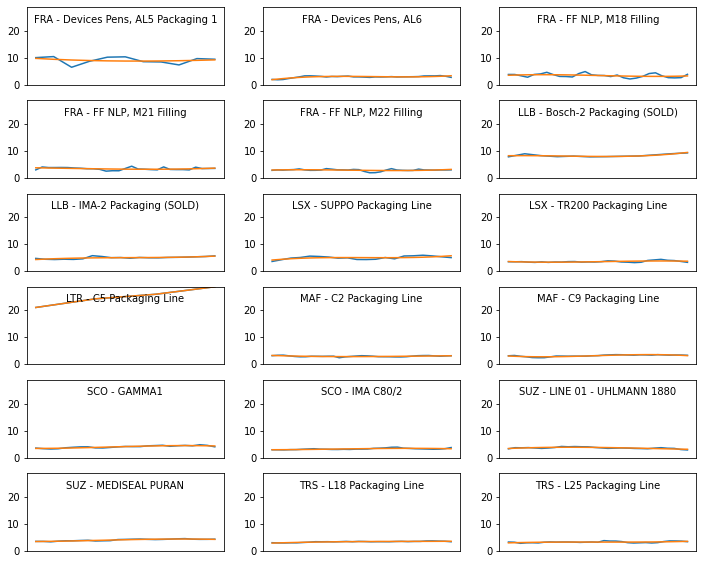

Performance %


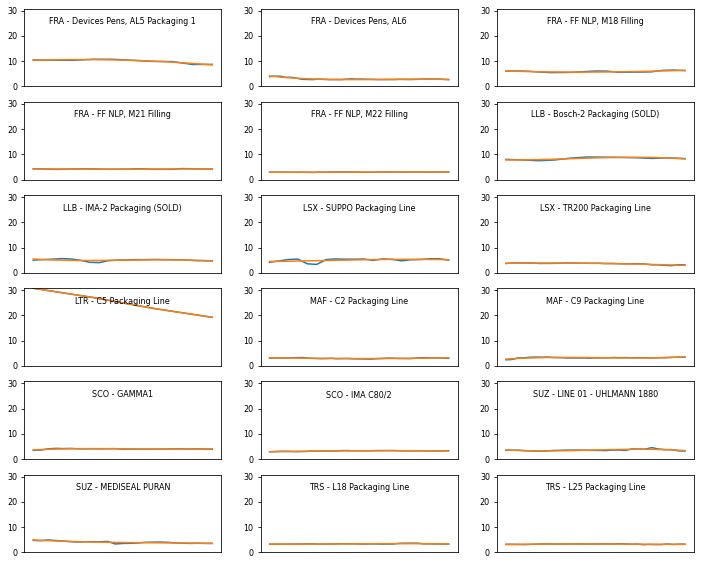

In [16]:
metrics = ['Availability %','Performance %']

d = {}

myDict={}
df_poly = pd.DataFrame()

for metric in metrics:

    ymax = 0

    for line in rolling_avg.Line.unique():
        y = rolling_avg[rolling_avg.Line == line][metric].dropna() / rolling_avg[rolling_avg.Line == line][metric].dropna().sum() * 100
        if max(y) > ymax:
            ymax = max(y)

    fig, axs = plt.subplots(int(len(rolling_avg.Line.unique())/3) + (len(rolling_avg.Line.unique()) % 3>0),3, figsize=(12,10))

    i=0
    j=0

    for line in rolling_avg.Line.unique():
        y = rolling_avg[rolling_avg.Line == line][metric].dropna() / rolling_avg[rolling_avg.Line == line][metric].dropna().sum() * 100
        x = np.arange(len(y))
        z = np.polyfit(x, y, 3)
        p = np.poly1d(z)

        axs[i,j].plot(x, y)
        axs[i,j].plot(x,p(x))
        axs[i,j].axes.get_xaxis().set_visible(False)
        axs[i,j].text(0.5, 0.8, line, transform=axs[i,j].transAxes, ha="center")
        axs[i,j].set_ylim(0,ymax)

        if j<2:
            j+=1
        else:
            i+=1
            j=0

        d[metric, line] = round(p(x[-1])-p(x[0]),0)
        myDict = {
            'metric': metric,
            'line': line,
            'start': [p(x[0])],
            'finish': [p(x[-1])],
        }


        df_poly = df_poly.append(pd.DataFrame(myDict))
    print (metric)
    plt.rcParams.update({'font.size': 8})
    plt.show()

Text(0.5, 1.0, 'Start and Finish Availability/Performance during Race')

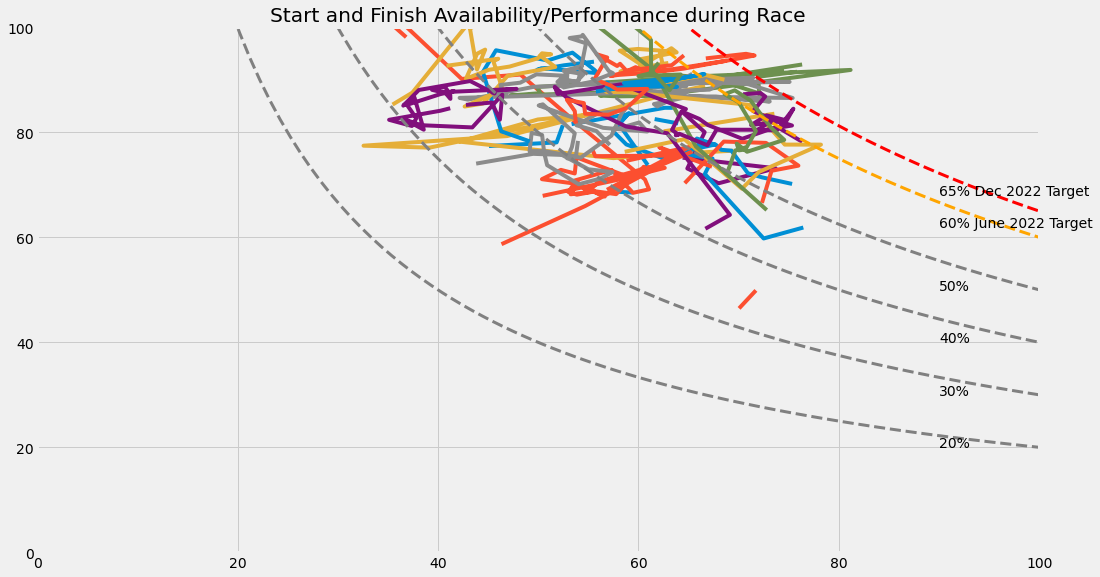

In [103]:
def oee_line(x, target):
    y = (target/x)
    return y

first = rolling_avg.groupby('Line').first().reset_index()
last = rolling_avg.groupby('Line').last().reset_index()

plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,9))

# plt.scatter(x=first['Availability %'], y=first['Performance %'])
# plt.scatter(x=last['Availability %'], y=last['Performance %'])

for line in rolling_avg.Line.unique():
    plt.plot(rolling_avg[rolling_avg.Line == line]['Availability %'], rolling_avg[rolling_avg.Line == line]['Performance %'])


plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 60), c='orange', lw=3, ls='--', label='60% June 2022 Target')
plt.annotate(xy=(90,62), text='60% June 2022 Target')
plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), 65), c='red', lw=3, ls='--', label='65% December 2022 Target')
plt.annotate(xy=(90,68), text='65% Dec 2022 Target')
for pct in [20,30,40,50]:
    plt.plot(np.linspace(.001,100,100), oee_line(np.linspace(.00001,1,100), pct), c='gray', lw=3, ls='--', label='{}%'.format(pct))
    plt.annotate(xy=(90,pct), text='{}%'.format(pct))
plt.xlim(0,100)
plt.ylim(0,100)
plt.title('Start and Finish Availability/Performance during Race')

In [96]:
first

,Line,Date,OEE %,Performance %,Availability %,Plant
0,"FRA - Devices Pens, AL5 Packaging 1",2021-04-04,51.045306,82.540508,61.618956,FRA
1,"FRA - Devices Pens, AL6",2021-04-04,34.306570,98.137907,36.828231,FRA
2,"FRA - FF NLP, M18 Filling",2021-04-04,46.886961,83.592359,57.549132,FRA
3,"FRA - FF NLP, M21 Filling",2021-04-04,52.054818,91.554178,55.880175,FRA
4,"FRA - FF NLP, M22 Filling",2021-04-04,53.887236,87.217070,61.462591,FRA
5,LLB - Bosch-2 Packaging (SOLD),2021-09-05,48.998346,75.189892,64.411768,LLB
6,LLB - IMA-2 Packaging (SOLD),2021-05-02,47.431127,74.664172,62.988431,LLB
7,LSX - SUPPO Packaging Line,2021-04-04,27.551428,58.703927,46.338416,LSX
8,LSX - TR200 Packaging Line,2021-04-04,56.552458,90.953208,62.641702,LSX
9,LTR - C5 Packaging Line,2021-09-19,52.523099,104.179237,53.381722,LTR


In [138]:
rolling_avg['Availability %'].dropna()

684     61.618956
685     63.969129
691     39.811429
692     53.333194
693     62.632659
          ...    
8798    43.424927
8799    46.417226
8800    46.176362
8801    45.363198
8802    42.790179
Name: Availability %, Length: 455, dtype: float64